In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
dataset_track ='/content/drive/My Drive/Colab Notebooks/data.csv'
data = pd.read_csv(dataset_track)
data

,track id,genre,amazement,solemnity,tenderness,nostalgia,calmness,power,joyful_activation,tension,sadness,mood,liked,disliked,age,gender,mother tongue
0,1,classical,0,1,0,0,0,0,1,1,0,3,1,0,21,1,English
1,1,classical,0,0,0,1,0,0,0,0,0,3,0,1,41,1,Dutch
2,1,classical,0,0,0,1,0,0,0,0,1,3,0,0,24,1,English
3,1,classical,0,0,0,0,1,0,0,0,0,3,0,0,32,0,Spanish
4,1,classical,0,0,0,1,1,0,0,0,0,4,0,1,21,0,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8402,400,pop,1,1,0,0,0,0,1,0,0,3,0,0,26,1,Russian
8403,400,pop,0,0,0,1,0,0,1,0,1,3,0,1,29,0,Russian
8404,400,pop,0,0,0,0,0,0,0,1,0,4,0,1,34,1,Polish
8405,400,pop,1,0,0,0,0,0,1,1,0,5,0,0,39,1,French


In [ ]:
# Print the size of the DataFrame after loading
print("Data size after loading:", data.shape)

Data size after loading: (8407, 4)


**MUSIC EMOTIONS CLASSIFICATION**

**MODEL 1**

*Firstly, I am performing Feature Engineering and Emotion Mapping*: Defining emotional indicator columns, creating functions to detect significant mood shifts and to map emotions based on dataset criteria



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Define the emotional indicators columns
emotion_columns = [
    ' amazement', ' solemnity', ' tenderness', ' nostalgia',
    ' calmness', ' power', ' joyful_activation', ' tension', ' sadness', ' mood', ' liked', ' disliked']

# Define a function to determine if there is a significant mood shift for a track
def significant_mood_shift(row, threshold=2):
    track_data = data[data['track id'] == row['track id']]
    mood_range = track_data[' mood'].max() - track_data[' mood'].min()
    return mood_range >= threshold


In [ ]:

# Function to map emotions based on dataset rows
def map_emotions(row):
    # High joy and high mood indicate happiness
    if row[' liked'] == 1 and row[' mood'] >= 4:
        if row[' joyful_activation'] == 1:
            return 'Happy'
        return 'Happy'
    # High tension and low mood indicate anger or fear
    if row[' tension'] == 1:
        if row[' power'] == 1 or row[' disliked'] == 1:
            return 'Angry'
        if row[' amazement'] == 1:
            return 'Fear'

    # Sadness can be a standalone indicator if mood is low
    if row[' sadness'] == 1 and row[' mood'] <= 2:
        return 'Sad'
    # Amazement combined with a mood shift indicates surprise
    if row[' amazement'] == 1 and significant_mood_shift(row):
        return 'Surprised'
    # Disgust is indicated by low tenderness, especially with solemnity
    if row[' tenderness'] == 0 and row[' mood'] <= 2:
        if row[' solemnity'] == 1:
            return 'Disgust'
    # Neutral is a default for moderate mood without strong indicators
    if row[' mood'] == 3:
        if row[' tension'] == 0 and row[' sadness'] == 0 and row[' joyful_activation'] == 0:
            return 'Neutral'
    # If no strong emotion is detected, the default is to check for the most dominant
    # emotional indicators present and map accordingly
    dominant_emotion = 'Neutral'  # Default to 'Neutral'
    if row[' joyful_activation'] == 1:
        dominant_emotion = 'Happy'
    elif row[' sadness'] == 1:
        dominant_emotion = 'Sad'
    elif row[' tension'] == 1:
        dominant_emotion = 'Angry'
    return dominant_emotion

**Setting Up the Machine Learning Environment and Preprocessing Data**

*Secondly, I am "Preparing Data and Feature Scaling*": I apply the emotion mapping to define the target variable, split the dataset for training and testing, and standardize the features to optimize model performance.

In [ ]:

# Apply the emotion mapping function to create a new column for the target emotion
data['target_emotion'] = data.apply(map_emotions, axis=1)

# Prepare the features (X) and target variable (y) for the model
X = data[emotion_columns]  # Features
y = data['target_emotion']  # Target variable

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


*Thirdly, I am performing "Model Training and Evaluation"*: Here, I initialize the Random Forest Classifier, train it on the scaled training data, and then make predictions on the test set. The model's performance is evaluated using accuracy and a detailed classification report, which are both displayed as output.

In [ ]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train_scaled, y_train)

# Predict the target emotions on the test set
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print(classification_rep)


Accuracy: 0.9956401109789933
              precision    recall  f1-score   support

       Angry       1.00      1.00      1.00       395
     Disgust       1.00      0.92      0.96        38
        Fear       1.00      1.00      1.00        16
       Happy       0.99      1.00      1.00       907
     Neutral       1.00      1.00      1.00       673
         Sad       1.00      0.98      0.99       305
   Surprised       0.99      1.00      0.99       189

    accuracy                           1.00      2523
   macro avg       1.00      0.99      0.99      2523
weighted avg       1.00      1.00      1.00      2523



*Fourthly, I am "Visualizing Feature Importances"*: This step involves extracting feature importances from the Random Forest model and visualizing them using a bar chart. I create a pandas series for the importances, sort them, and then plot them using Matplotlib to identify which features have the most influence on the model's predictions.

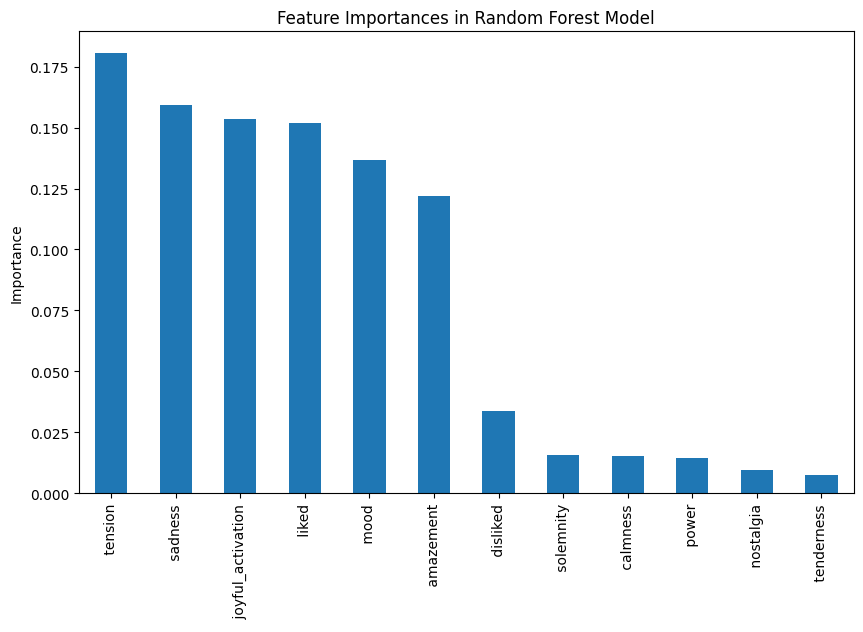

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the model
feature_importances = rf_classifier.feature_importances_

# Create a pandas series to visualize them
importances = pd.Series(feature_importances, index=emotion_columns)

# Sort the feature importances
sorted_importances = importances.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10,6))
sorted_importances.plot(kind='bar')
plt.title('Feature Importances in Random Forest Model')
plt.ylabel('Importance')
plt.show()



*Fifthly, I am "Implementing Cross-Validation":* In this phase, I conduct K-Fold cross-validation (with K=10) using a new Random Forest Classifier. This process evaluates the model's performance across different subsets of the training data, providing a more robust measure of its accuracy. The scores for each fold and the average cross-validation score are calculated and displayed to assess the model's consistency and reliability.

In [ ]:
from sklearn.model_selection import cross_val_score

# Initialize a new Random Forest Classifier
rf_cv_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform K-Fold cross-validation (let's use K=10)
cv_scores = cross_val_score(rf_cv_classifier, X_train_scaled, y_train, cv=10)

# Print the cross-validation scores for each fold
print(cv_scores)

# Print the average cross-validation score
print(f"Average CV Score: {cv_scores.mean()}")


[0.99830221 0.99490662 0.99660441 1.         0.99489796 0.99489796
 0.99829932 1.         1.         0.99829932]
Average CV Score: 0.997620780060751


*Lastly, I am "Optimizing Model Parameters with Grid Search":* This involves using GridSearchCV to fine-tune the Random Forest Classifier's parameters, specifically the number of estimators. I define a parameter grid, perform grid search across different values within this grid, and fit it to the scaled training data. The best parameters and the best score obtained from the grid search are then displayed, which helps in identifying the most effective configuration for the model.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200]
}

# Initialize the grid search
grid_search = GridSearchCV(estimator=rf_cv_classifier, param_grid=param_grid, cv=10)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found by grid search
print(f"Best Parameters: {grid_search.best_params_}")

# Print the best score found by grid search
print(f"Best Score: {grid_search.best_score_}")


Best Parameters: {'n_estimators': 100}
Best Score: 0.997620780060751


In [ ]:
!pip install librosa

In [ ]:
!pip install pydub

In [ ]:
!pip install resampy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 18.8 MB/s eta 0:00:00


In [ ]:
!pip install essentia

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 72.0 MB/s eta 0:00:00


**MODEL 2**

*Environment Setup and Data Access*

In [ ]:
from google.colab import drive
import os

# Base path as seen in the picture
base_path = '/content/drive/My Drive/Colab Notebooks/'

# Path to the 'classical' folder, change 'classical' to 'electronic', 'pop', 'rock' accordingly
path_to_folder = os.path.join(base_path, 'classical')

In [ ]:
# List all MP3 files in the 'classical' folder
classical_files = [os.path.join(path_to_folder, file) for file in os.listdir(path_to_folder) if file.endswith('.mp3')]
print(f'Found {len(classical_files)} MP3 files in classical folder.')


Found 100 MP3 files in classical folder.


Organizing and Sorting Music Data*

 I am implementing a function to convert filenames into a format that will sort them numerically. The atoi() and natural_keys() functions are defined to achieve this. Then, I apply the natural_keys() function to sort the file paths of my classical music dataset in a human-readable order. This sorting is essential to ensure that the dataset is properly ordered for subsequent processing and analysis.

In [ ]:
import re

# Function to convert the filenames into a form that will sort numerically
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    '''
    return [atoi(c) for c in re.split(r'(\d+)', text)]

# Now sort the files using the natural_keys function
classical_files.sort(key=natural_keys)

# Print the sorted file paths
for file_path in classical_files:
    print(file_path)


/content/drive/My Drive/Colab Notebooks/classical/1.mp3
/content/drive/My Drive/Colab Notebooks/classical/2.mp3
/content/drive/My Drive/Colab Notebooks/classical/3.mp3
/content/drive/My Drive/Colab Notebooks/classical/4.mp3
/content/drive/My Drive/Colab Notebooks/classical/5.mp3
/content/drive/My Drive/Colab Notebooks/classical/6.mp3
/content/drive/My Drive/Colab Notebooks/classical/7.mp3
/content/drive/My Drive/Colab Notebooks/classical/8.mp3
/content/drive/My Drive/Colab Notebooks/classical/9.mp3
/content/drive/My Drive/Colab Notebooks/classical/10.mp3
/content/drive/My Drive/Colab Notebooks/classical/11.mp3
/content/drive/My Drive/Colab Notebooks/classical/12.mp3
/content/drive/My Drive/Colab Notebooks/classical/13.mp3
/content/drive/My Drive/Colab Notebooks/classical/14.mp3
/content/drive/My Drive/Colab Notebooks/classical/15.mp3
/content/drive/My Drive/Colab Notebooks/classical/16.mp3
/content/drive/My Drive/Colab Notebooks/classical/17.mp3
/content/drive/My Drive/Colab Notebooks/

*Thirdly, I am  "Loading Audio Data," I am using the librosa library to load the audio data from the sorted file paths of my classical music dataset*

In [ ]:
import librosa

# Initialize a list to hold the audio data and sample rates
audio_data = []

# Loop through the sorted file paths and load each one
for file_path in classical_files:
    try:
        # Load the audio file
        audio, sr = librosa.load(file_path, sr=None)
        # Append the audio data and sample rate to your list
        audio_data.append((audio, sr))
    except Exception as e:
        # If there's an error loading a file, print the error message
        print(f"Could not load file {file_path}: {e}")

# Now you have your audio_data list populated with the audio and sample rates


* Below, I applied the same data loading and preprocessing steps to the music genres, Rock, Pop, and Electronic*

In [ ]:
import os

# Base path as seen in the picture
base_path = '/content/drive/My Drive/Colab Notebooks'

# Path to the 'electronic' folder
path_to_electronic = os.path.join(base_path, 'electronic')


In [ ]:
import os
import re

# Function to sort the files in human order
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [atoi(c) for c in re.split(r'(\d+)', text)]

# Base path as seen in the picture
base_path = '/content/drive/My Drive/Colab Notebooks'

# Path to the 'electronic' folder
path_to_electronic = os.path.join(base_path, 'electronic')

# List all MP3 files in the 'electronic' folder, excluding duplicates
electronic_files = [os.path.join(path_to_electronic, file) for file in os.listdir(path_to_electronic) if file.endswith('.mp3') and "(1)" not in file]
electronic_files.sort(key=natural_keys)

# Print the sorted file paths (optional)
for file_path in electronic_files:
    print(file_path)



/content/drive/My Drive/Colab Notebooks/electronic/1.mp3
/content/drive/My Drive/Colab Notebooks/electronic/2.mp3
/content/drive/My Drive/Colab Notebooks/electronic/3.mp3
/content/drive/My Drive/Colab Notebooks/electronic/4.mp3
/content/drive/My Drive/Colab Notebooks/electronic/5.mp3
/content/drive/My Drive/Colab Notebooks/electronic/6.mp3
/content/drive/My Drive/Colab Notebooks/electronic/7.mp3
/content/drive/My Drive/Colab Notebooks/electronic/8.mp3
/content/drive/My Drive/Colab Notebooks/electronic/9.mp3
/content/drive/My Drive/Colab Notebooks/electronic/10.mp3
/content/drive/My Drive/Colab Notebooks/electronic/11.mp3
/content/drive/My Drive/Colab Notebooks/electronic/12.mp3
/content/drive/My Drive/Colab Notebooks/electronic/13.mp3
/content/drive/My Drive/Colab Notebooks/electronic/14.mp3
/content/drive/My Drive/Colab Notebooks/electronic/15.mp3
/content/drive/My Drive/Colab Notebooks/electronic/16.mp3
/content/drive/My Drive/Colab Notebooks/electronic/17.mp3
/content/drive/My Drive

In [ ]:
import librosa

# Initialize a list to hold your audio data and sample rates
audio_data_electronic = []

# Loop through the sorted file paths and load each one
for file_path in electronic_files:
    try:
        # Load the audio file
        audio, sr = librosa.load(file_path, sr=None)
        # Append the audio data and sample rate to your list
        audio_data_electronic.append((audio, sr))
        # Print a message after each successful load (optional)
        print(f"Loaded file: {file_path}")
    except Exception as e:
        # Print out which file caused an exception and the exception message
        print(f"Could not load file {file_path}: {e}")

# Check if the expected number of files are loaded
expected_file_count = 100
if len(audio_data_electronic) == expected_file_count:
    print(f"Loaded {expected_file_count} audio files into memory.")
else:
    print(f"Loaded {len(audio_data_electronic)} audio files into memory. Some files may not have been loaded correctly.")


Loaded file: /content/drive/My Drive/Colab Notebooks/electronic/1.mp3
Loaded file: /content/drive/My Drive/Colab Notebooks/electronic/2.mp3
Loaded file: /content/drive/My Drive/Colab Notebooks/electronic/3.mp3
Loaded file: /content/drive/My Drive/Colab Notebooks/electronic/4.mp3
Loaded file: /content/drive/My Drive/Colab Notebooks/electronic/5.mp3
Loaded file: /content/drive/My Drive/Colab Notebooks/electronic/6.mp3
Loaded file: /content/drive/My Drive/Colab Notebooks/electronic/7.mp3
Loaded file: /content/drive/My Drive/Colab Notebooks/electronic/8.mp3
Loaded file: /content/drive/My Drive/Colab Notebooks/electronic/9.mp3
Loaded file: /content/drive/My Drive/Colab Notebooks/electronic/10.mp3
Loaded file: /content/drive/My Drive/Colab Notebooks/electronic/11.mp3
Loaded file: /content/drive/My Drive/Colab Notebooks/electronic/12.mp3
Loaded file: /content/drive/My Drive/Colab Notebooks/electronic/13.mp3
Loaded file: /content/drive/My Drive/Colab Notebooks/electronic/14.mp3
Loaded file: /c

In [ ]:
import os

# Base path as seen in the picture
base_path = '/content/drive/My Drive/Colab Notebooks'

# Path to the 'pop' folder
path_to_pop = os.path.join(base_path, 'pop')


In [ ]:
import re

# Function to sort the files in human order
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [atoi(c) for c in re.split(r'(\d+)', text)]

# List all MP3 files in the 'pop' folder
pop_files = [os.path.join(path_to_pop, file) for file in os.listdir(path_to_pop) if file.endswith('.mp3')]
pop_files.sort(key=natural_keys)

# Print the sorted file paths (optional)
for file_path in pop_files:
    print(file_path)


/content/drive/My Drive/Colab Notebooks/pop/1.mp3
/content/drive/My Drive/Colab Notebooks/pop/2.mp3
/content/drive/My Drive/Colab Notebooks/pop/3.mp3
/content/drive/My Drive/Colab Notebooks/pop/4.mp3
/content/drive/My Drive/Colab Notebooks/pop/5.mp3
/content/drive/My Drive/Colab Notebooks/pop/6.mp3
/content/drive/My Drive/Colab Notebooks/pop/7.mp3
/content/drive/My Drive/Colab Notebooks/pop/8.mp3
/content/drive/My Drive/Colab Notebooks/pop/9.mp3
/content/drive/My Drive/Colab Notebooks/pop/10.mp3
/content/drive/My Drive/Colab Notebooks/pop/11.mp3
/content/drive/My Drive/Colab Notebooks/pop/12.mp3
/content/drive/My Drive/Colab Notebooks/pop/13.mp3
/content/drive/My Drive/Colab Notebooks/pop/14.mp3
/content/drive/My Drive/Colab Notebooks/pop/15.mp3
/content/drive/My Drive/Colab Notebooks/pop/16.mp3
/content/drive/My Drive/Colab Notebooks/pop/17.mp3
/content/drive/My Drive/Colab Notebooks/pop/18.mp3
/content/drive/My Drive/Colab Notebooks/pop/19.mp3
/content/drive/My Drive/Colab Notebooks/

In [ ]:
import librosa

# Initialize a list to hold your audio data and sample rates
audio_data_pop = []

# Loop through the sorted file paths and load each one
for file_path in pop_files:
    try:
        # Load the audio file
        audio, sr = librosa.load(file_path, sr=None)
        # Append the audio data and sample rate to your list
        audio_data_pop.append((audio, sr))
        # Print a message after each successful load (optional)
        print(f"Loaded file: {file_path}")
    except Exception as e:
        # Print out which file caused an exception and the exception message
        print(f"Could not load file {file_path}: {e}")

# Check if all files are loaded
if len(audio_data_pop) == 100:
    print("Loaded 100 audio files into memory.")
else:
    print(f"Loaded {len(audio_data_pop)} audio files into memory. Some files may not have been loaded correctly.")


Loaded file: /content/drive/My Drive/Colab Notebooks/pop/1.mp3
Loaded file: /content/drive/My Drive/Colab Notebooks/pop/2.mp3
Loaded file: /content/drive/My Drive/Colab Notebooks/pop/3.mp3
Loaded file: /content/drive/My Drive/Colab Notebooks/pop/4.mp3
Loaded file: /content/drive/My Drive/Colab Notebooks/pop/5.mp3
Loaded file: /content/drive/My Drive/Colab Notebooks/pop/6.mp3
Loaded file: /content/drive/My Drive/Colab Notebooks/pop/7.mp3
Loaded file: /content/drive/My Drive/Colab Notebooks/pop/8.mp3
Loaded file: /content/drive/My Drive/Colab Notebooks/pop/9.mp3
Loaded file: /content/drive/My Drive/Colab Notebooks/pop/10.mp3
Loaded file: /content/drive/My Drive/Colab Notebooks/pop/11.mp3
Loaded file: /content/drive/My Drive/Colab Notebooks/pop/12.mp3
Loaded file: /content/drive/My Drive/Colab Notebooks/pop/13.mp3
Loaded file: /content/drive/My Drive/Colab Notebooks/pop/14.mp3
Loaded file: /content/drive/My Drive/Colab Notebooks/pop/15.mp3
Loaded file: /content/drive/My Drive/Colab Notebo

In [ ]:
import os

# Base path as seen in the picture
base_path = '/content/drive/My Drive/Colab Notebooks'

# Path to the 'rock' folder
path_to_rock = os.path.join(base_path, 'rock')


In [ ]:
import re

# Function to sort the files in human order
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [atoi(c) for c in re.split(r'(\d+)', text)]

# List all MP3 files in the 'rock' folder
rock_files = [os.path.join(path_to_rock, file) for file in os.listdir(path_to_rock) if file.endswith('.mp3')]
rock_files.sort(key=natural_keys)

# Print the sorted file paths (optional)
for file_path in rock_files:
    print(file_path)


/content/drive/My Drive/Colab Notebooks/rock/1.mp3
/content/drive/My Drive/Colab Notebooks/rock/2.mp3
/content/drive/My Drive/Colab Notebooks/rock/3.mp3
/content/drive/My Drive/Colab Notebooks/rock/4.mp3
/content/drive/My Drive/Colab Notebooks/rock/5.mp3
/content/drive/My Drive/Colab Notebooks/rock/6.mp3
/content/drive/My Drive/Colab Notebooks/rock/7.mp3
/content/drive/My Drive/Colab Notebooks/rock/8.mp3
/content/drive/My Drive/Colab Notebooks/rock/9.mp3
/content/drive/My Drive/Colab Notebooks/rock/10.mp3
/content/drive/My Drive/Colab Notebooks/rock/11.mp3
/content/drive/My Drive/Colab Notebooks/rock/12.mp3
/content/drive/My Drive/Colab Notebooks/rock/13.mp3
/content/drive/My Drive/Colab Notebooks/rock/14.mp3
/content/drive/My Drive/Colab Notebooks/rock/15.mp3
/content/drive/My Drive/Colab Notebooks/rock/16.mp3
/content/drive/My Drive/Colab Notebooks/rock/17.mp3
/content/drive/My Drive/Colab Notebooks/rock/18.mp3
/content/drive/My Drive/Colab Notebooks/rock/19.mp3
/content/drive/My Dri

In [ ]:
import librosa

# Initialize a list to hold your audio data and sample rates
audio_data_rock = []

# Loop through the sorted file paths and load each one
for file_path in rock_files:
    try:
        # Load the audio file
        audio, sr = librosa.load(file_path, sr=None)
        # Append the audio data and sample rate to your list
        audio_data_rock.append((audio, sr))
        # Print a message after each successful load (optional)
        print(f"Loaded file: {file_path}")
    except Exception as e:
        # Print out which file caused an exception and the exception message
        print(f"Could not load file {file_path}: {e}")

# Check if all files are loaded
if len(audio_data_rock) == 100:
    print("Loaded 100 audio files into memory.")
else:
    print(f"Loaded {len(audio_data_rock)} audio files into memory. Some files may not have been loaded correctly.")


Loaded file: /content/drive/My Drive/Colab Notebooks/rock/1.mp3
Loaded file: /content/drive/My Drive/Colab Notebooks/rock/2.mp3
Loaded file: /content/drive/My Drive/Colab Notebooks/rock/3.mp3
Loaded file: /content/drive/My Drive/Colab Notebooks/rock/4.mp3
Loaded file: /content/drive/My Drive/Colab Notebooks/rock/5.mp3
Loaded file: /content/drive/My Drive/Colab Notebooks/rock/6.mp3
Loaded file: /content/drive/My Drive/Colab Notebooks/rock/7.mp3
Loaded file: /content/drive/My Drive/Colab Notebooks/rock/8.mp3
Loaded file: /content/drive/My Drive/Colab Notebooks/rock/9.mp3
Loaded file: /content/drive/My Drive/Colab Notebooks/rock/10.mp3
Loaded file: /content/drive/My Drive/Colab Notebooks/rock/11.mp3
Loaded file: /content/drive/My Drive/Colab Notebooks/rock/12.mp3
Loaded file: /content/drive/My Drive/Colab Notebooks/rock/13.mp3
Loaded file: /content/drive/My Drive/Colab Notebooks/rock/14.mp3
Loaded file: /content/drive/My Drive/Colab Notebooks/rock/15.mp3
Loaded file: /content/drive/My Dri

*Fourthly,"Feature Extraction"; I am performing feature extraction on the audio data for the different music genres, including Classical, Rock, Pop, and Electronic.*

In [ ]:
import numpy as np
import librosa

import numpy as np
import librosa

# Initialize lists to hold feature data for each file
mfccs_classical = []
chroma_classical = []
mel_classical = []
contrast_classical = []
tonnetz_classical = []

# Function to extract features from an audio file
def extract_features(audio, sr):
    # Mel-frequency cepstral coefficients
    mfcc = librosa.feature.mfcc(y=audio, sr=sr)

    # Chromagram from a waveform or power spectrogram
    chroma = librosa.feature.chroma_stft(y=audio, sr=sr)

    # Mel-scaled spectrogram
    mel = librosa.feature.melspectrogram(y=audio, sr=sr)

    # Spectral contrast
    contrast = librosa.feature.spectral_contrast(y=audio, sr=sr)

    # Tonnetz
    tonnetz = librosa.feature.tonnetz(y=audio, sr=sr)

    return mfcc, chroma, mel, contrast, tonnetz

# Loop through the audio data and extract features
for audio, sr in audio_data:
    mfcc, chroma, mel, contrast, tonnetz = extract_features(audio, sr)
    mfccs_classical.append(mfcc)
    chroma_classical.append(chroma)
    mel_classical.append(mel)
    contrast_classical.append(contrast)
    tonnetz_classical.append(tonnetz)

print("Feature extraction for classical genre completed.")


Feature extraction for classical genre completed.


In [ ]:
# Check the lengths of the feature lists
print("Number of files in feature lists:")
print(f"MFCCs: {len(mfccs_classical)}")
print(f"Chroma: {len(chroma_classical)}")
print(f"Mel: {len(mel_classical)}")
print(f"Contrast: {len(contrast_classical)}")
print(f"Tonnetz: {len(tonnetz_classical)}")

# Check dimensions of feature data for the first file
print("\nFeature dimensions for the first file:")
print(f"MFCCs: {mfccs_classical[1].shape}")
print(f"Chroma: {chroma_classical[1].shape}")


Number of files in feature lists:
MFCCs: 100
Chroma: 100
Mel: 100
Contrast: 100
Tonnetz: 100

Feature dimensions for the first file:
MFCCs: (20, 5171)
Chroma: (12, 5171)


In [ ]:
import numpy as np
import librosa

# Initialize lists to hold feature data for each file in the electronic genre
mfccs_electronic = []
chroma_electronic = []
mel_electronic = []
contrast_electronic = []
tonnetz_electronic = []

# Loop through the audio data for the electronic genre and extract features
for audio, sr in audio_data_electronic:
    try:
        mfcc, chroma, mel, contrast, tonnetz = extract_features(audio, sr)
        mfccs_electronic.append(mfcc)
        chroma_electronic.append(chroma)
        mel_electronic.append(mel)
        contrast_electronic.append(contrast)
        tonnetz_electronic.append(tonnetz)
    except Exception as e:
        print(f"Error extracting features from one of the files: {e}")

print("Feature extraction for electronic genre completed.")


Feature extraction for electronic genre completed.


In [ ]:
# Check the lengths of the feature lists
print("Number of files in feature lists for electronic genre:")
print(f"MFCCs: {len(mfccs_electronic)}")
print(f"Chroma: {len(chroma_electronic)}")
print(f"Mel: {len(mel_electronic)}")
print(f"Contrast: {len(contrast_electronic)}")
print(f"Tonnetz: {len(tonnetz_electronic)}")

# Check dimensions of feature data for the first file in the electronic genre
if len(mfccs_electronic) > 0:  # Ensure there is at least one file
    print("\nFeature dimensions for the first file in electronic genre:")
    print(f"MFCCs: {mfccs_electronic[0].shape}")
    print(f"Chroma: {chroma_electronic[0].shape}")
    print(f"Mel: {mel_electronic[0].shape}")
    print(f"Contrast: {contrast_electronic[0].shape}")
    print(f"Tonnetz: {tonnetz_electronic[0].shape}")
else:
    print("\nNo features extracted for the electronic genre.")

Number of files in feature lists for electronic genre:
MFCCs: 100
Chroma: 100
Mel: 100
Contrast: 100
Tonnetz: 100

Feature dimensions for the first file in electronic genre:
MFCCs: (20, 5171)
Chroma: (12, 5171)
Mel: (128, 5171)
Contrast: (7, 5171)
Tonnetz: (6, 5171)


In [ ]:
# Initialize lists to hold feature data for each file in the pop genre
mfccs_pop = []
chroma_pop = []
mel_pop = []
contrast_pop = []
tonnetz_pop = []

# Loop through the audio data for the pop genre and extract features
for audio, sr in audio_data_pop:
    try:
        mfcc, chroma, mel, contrast, tonnetz = extract_features(audio, sr)
        mfccs_pop.append(mfcc)
        chroma_pop.append(chroma)
        mel_pop.append(mel)
        contrast_pop.append(contrast)
        tonnetz_pop.append(tonnetz)
    except Exception as e:
        print(f"Error extracting features from one of the files: {e}")

print("Feature extraction for pop genre completed.")

Feature extraction for pop genre completed.


In [ ]:
# Check the lengths of the feature lists
print("Number of files in feature lists for pop genre:")
print(f"MFCCs: {len(mfccs_pop)}")
print(f"Chroma: {len(chroma_pop)}")
print(f"Mel: {len(mel_pop)}")
print(f"Contrast: {len(contrast_pop)}")
print(f"Tonnetz: {len(tonnetz_pop)}")

# Check dimensions of feature data for the first file in the pop genre
if len(mfccs_pop) > 0:  # Ensure there is at least one file
    print("\nFeature dimensions for the first file in pop genre:")
    print(f"MFCCs: {mfccs_pop[0].shape}")
    print(f"Chroma: {chroma_pop[0].shape}")
    print(f"Mel: {mel_pop[0].shape}")
    print(f"Contrast: {contrast_pop[0].shape}")
    print(f"Tonnetz: {tonnetz_pop[0].shape}")
else:
    print("\nNo features extracted for the pop genre.")

Number of files in feature lists for pop genre:
MFCCs: 100
Chroma: 100
Mel: 100
Contrast: 100
Tonnetz: 100

Feature dimensions for the first file in pop genre:
MFCCs: (20, 5171)
Chroma: (12, 5171)
Mel: (128, 5171)
Contrast: (7, 5171)
Tonnetz: (6, 5171)


In [ ]:
# Initialize lists to hold feature data for each file in the rock genre
mfccs_rock = []
chroma_rock = []
mel_rock = []
contrast_rock = []
tonnetz_rock = []

# Loop through the audio data for the rock genre and extract features
for audio, sr in audio_data_rock:
    try:
        mfcc, chroma, mel, contrast, tonnetz = extract_features(audio, sr)
        mfccs_rock.append(mfcc)
        chroma_rock.append(chroma)
        mel_rock.append(mel)
        contrast_rock.append(contrast)
        tonnetz_rock.append(tonnetz)
    except Exception as e:
        print(f"Error extracting features from one of the files: {e}")

print("Feature extraction for rock genre completed.")

Feature extraction for rock genre completed.


In [ ]:
# Check the lengths of the feature lists
print("Number of files in feature lists for rock genre:")
print(f"MFCCs: {len(mfccs_rock)}")
print(f"Chroma: {len(chroma_rock)}")
print(f"Mel: {len(mel_rock)}")
print(f"Contrast: {len(contrast_rock)}")
print(f"Tonnetz: {len(tonnetz_rock)}")

# Check dimensions of feature data for the first file in the rock genre
if len(mfccs_rock) > 0:  # Ensure there is at least one file
    print("\nFeature dimensions for the first file in rock genre:")
    print(f"MFCCs: {mfccs_rock[0].shape}")
    print(f"Chroma: {chroma_rock[0].shape}")
    print(f"Mel: {mel_rock[0].shape}")
    print(f"Contrast: {contrast_rock[0].shape}")
    print(f"Tonnetz: {tonnetz_rock[0].shape}")
else:
    print("\nNo features extracted for the rock genre.")

Number of files in feature lists for rock genre:
MFCCs: 100
Chroma: 100
Mel: 100
Contrast: 100
Tonnetz: 100

Feature dimensions for the first file in rock genre:
MFCCs: (20, 5171)
Chroma: (12, 5171)
Mel: (128, 5171)
Contrast: (7, 5171)
Tonnetz: (6, 5171)


*Fifthly,"Feature Aggregation," I am calculating the mean of audio features across time frames for each music genre and feature type, including MFCCs, chroma, mel-scaled spectrograms, spectral contrast, and tonnetz. I defined a function called aggregate_features() to compute the mean along the time axis (axis=1) for each feature.*

In [ ]:
import numpy as np

# Function to calculate the mean of features across time frames
def aggregate_features(features):
    return np.array([np.mean(feature, axis=1) for feature in features])  # Calculate mean across time frames (axis=1)

# Aggregating features for each genre and feature type
mfccs_classical_agg = aggregate_features(mfccs_classical)
mfccs_rock_agg = aggregate_features(mfccs_rock)
mfccs_electronic_agg = aggregate_features(mfccs_electronic)
mfccs_pop_agg = aggregate_features(mfccs_pop)

chroma_classical_agg = aggregate_features(chroma_classical)
chroma_rock_agg = aggregate_features(chroma_rock)
chroma_electronic_agg = aggregate_features(chroma_electronic)
chroma_pop_agg = aggregate_features(chroma_pop)

mel_classical_agg = aggregate_features(mel_classical)
mel_rock_agg = aggregate_features(mel_rock)
mel_electronic_agg = aggregate_features(mel_electronic)
mel_pop_agg = aggregate_features(mel_pop)

contrast_classical_agg = aggregate_features(contrast_classical)
contrast_rock_agg = aggregate_features(contrast_rock)
contrast_electronic_agg = aggregate_features(contrast_electronic)
contrast_pop_agg = aggregate_features(contrast_pop)

tonnetz_classical_agg = aggregate_features(tonnetz_classical)
tonnetz_rock_agg = aggregate_features(tonnetz_rock)
tonnetz_electronic_agg = aggregate_features(tonnetz_electronic)
tonnetz_pop_agg = aggregate_features(tonnetz_pop)

# Check the shape of the aggregated arrays
print("Shape of aggregated feature arrays:")
print(f"MFCCs Classical: {mfccs_classical_agg.shape}")
print(f"Chroma Classical: {chroma_classical_agg.shape}")
# ... repeat for other features and genres

# Inspect the first few values of one aggregated array
print("\nFirst few values of MFCCs for Classical genre:")
print(mfccs_classical_agg[0][:5])  # First 5 MFCC values of the first track



Shape of aggregated feature arrays:
MFCCs Classical: (100, 20)
Chroma Classical: (100, 12)

First few values of MFCCs for Classical genre:
[-333.96432    147.23233     -7.0079765    2.8494134   -7.615041 ]


*Sixthly, "Concatenating and Creating Feature DataFrame," I am arranging the calculated audio features in the correct order and concatenating them to create a comprehensive feature dataset. Ensuring that the features for each music genre (Classical, Rock, Electronic, and Pop) are concatenated in the specified track order.*

In [ ]:
# Correct order of concatenation based on the specified track order
all_mfccs = np.concatenate((mfccs_classical_agg, mfccs_rock_agg, mfccs_electronic_agg, mfccs_pop_agg), axis=0)
all_chroma = np.concatenate((chroma_classical_agg, chroma_rock_agg, chroma_electronic_agg, chroma_pop_agg), axis=0)
all_mel = np.concatenate((mel_classical_agg, mel_rock_agg, mel_electronic_agg, mel_pop_agg), axis=0)
all_contrast = np.concatenate((contrast_classical_agg, contrast_rock_agg, contrast_electronic_agg, contrast_pop_agg), axis=0)
all_tonnetz = np.concatenate((tonnetz_classical_agg, tonnetz_rock_agg, tonnetz_electronic_agg, tonnetz_pop_agg), axis=0)

# Create a DataFrame from the concatenated features
features_df = pd.DataFrame({
    'track_id': range(1, 401),
    'mfccs': list(all_mfccs),
    'chroma': list(all_chroma),
    'mel': list(all_mel),
    'contrast': list(all_contrast),
    'tonnetz': list(all_tonnetz)
})


In [ ]:
# Check the shape of the concatenated feature arrays
print("Shape of concatenated feature arrays:")
print(f"All MFCCs: {all_mfccs.shape}")
print(f"All Chroma: {all_chroma.shape}")
# ... repeat for other features

# Inspect the first few values of the first and last tracks in each feature set
print("\nFirst few values of the first track (Classical genre):")
print(f"MFCCs: {all_mfccs[0][:5]}")  # First 5 MFCC values of the first classical track

print("\nFirst few values of the last track (Pop genre):")
print(f"MFCCs: {all_mfccs[-1][:5]}")  # First 5 MFCC values of the last pop track


Shape of concatenated feature arrays:
All MFCCs: (400, 20)
All Chroma: (400, 12)

First few values of the first track (Classical genre):
MFCCs: [-333.96432    147.23233     -7.0079765    2.8494134   -7.615041 ]

First few values of the last track (Pop genre):
MFCCs: [-172.49162   166.02737   -36.308556   54.78486     7.259889]


In [ ]:
# Print the column names of the original data DataFrame
print("Columns in the original data DataFrame:")
print(data.columns)


Columns in the original data DataFrame:
Index(['track id', ' genre', ' amazement', ' solemnity', ' tenderness',
       ' nostalgia', ' calmness', ' power', ' joyful_activation', ' tension',
       ' sadness', ' mood', ' liked', ' disliked', ' age', ' gender',
       ' mother tongue', 'target_emotion'],
      dtype='object')


*Seventhly, "Merging Features with Annotations," I am preparing and merging the feature data with the existing annotations. This step ensures that the feature data aligns with the track IDs in the annotations data.*

In [ ]:
import pandas as pd

# Assuming 'features_df' is already created from the previous step


# Rename 'track id' to 'track_id' in the data DataFrame for consistency
data = data.rename(columns={'track id': 'track_id'})

# Prepare the features DataFrame by extracting mean values from the feature arrays
features_df_expanded = pd.DataFrame({
    'track_id': range(1, 401),
    'mfccs_mean': [np.mean(mfccs, axis=0) for mfccs in features_df['mfccs']],
    'chroma_mean': [np.mean(chroma, axis=0) for chroma in features_df['chroma']],
    'mel_mean': [np.mean(mel, axis=0) for mel in features_df['mel']],
    'contrast_mean': [np.mean(contrast, axis=0) for contrast in features_df['contrast']],
    'tonnetz_mean': [np.mean(tonnetz, axis=0) for tonnetz in features_df['tonnetz']]
})

# Merge the features with the annotations
combined_df = pd.merge(data, features_df_expanded, on='track_id')

# Optional: Save the combined DataFrame to a new CSV file
# combined_df.to_csv('/content/drive/My Drive/Colab Notebooks/combined_data.csv', index=False)

print("Merging completed. The combined DataFrame is ready for use.")



Merging completed. The combined DataFrame is ready for use.


In [ ]:
# Check the shape of the combined DataFrame
print("Shape of the combined DataFrame:")
print(combined_df.shape)

# Inspect the first few rows of the combined DataFrame
print("\nFirst few rows of the combined DataFrame:")
print(combined_df.head())

# Inspect the last few rows of the combined DataFrame
print("\nLast few rows of the combined DataFrame:")
print(combined_df.tail())

# Check for NaN values
print("\nCheck for NaN values in the combined DataFrame:")
print(combined_df.isna().sum())


Shape of the combined DataFrame:
(8407, 23)

First few rows of the combined DataFrame:
   track_id      genre   amazement   solemnity   tenderness   nostalgia  \
0         1  classical           0           1            0           0   
1         1  classical           0           0            0           1   
2         1  classical           0           0            0           1   
3         1  classical           0           0            0           0   
4         1  classical           0           0            0           1   

    calmness   power   joyful_activation   tension  ...   disliked   age  \
0          0       0                   1         1  ...          0    21   
1          0       0                   0         0  ...          1    41   
2          0       0                   0         0  ...          0    24   
3          1       0                   0         0  ...          0    32   
4          1       0                   0         0  ...          1    21   

    g

*Eighthly, "Emotion Mapping and Mood Shift Detection," I am defining functions and applying them to the combined DataFrame (combined_df) to map emotions and detect significant mood shifts for each track. This step contributes to the emotional analysis of the music data.*

In [ ]:
# Function to determine if there is a significant mood shift for a track
def significant_mood_shift(row, threshold=2):
    track_data = combined_df[combined_df['track_id'] == row['track_id']]
    mood_range = track_data[' mood'].max() - track_data[' mood'].min()
    return mood_range >= threshold

# Function to map emotions based on dataset rows
# Function to map emotions based on dataset rows
def map_emotions(row):
    # High joy and high mood indicate happiness
    if row[' liked'] == 1 and row[' mood'] >= 4:
        if row[' joyful_activation'] == 1:
            return 'Happy'
        return 'Happy'
    # High tension and low mood indicate anger or fear
    if row[' tension'] == 1:
        if row[' power'] == 1 or row[' disliked'] == 1:
            return 'Angry'
        if row[' amazement'] == 1:
            return 'Fear'

    # Sadness can be a standalone indicator if mood is low
    if row[' sadness'] == 1 and row[' mood'] <= 2:
        return 'Sad'
    # Amazement combined with a mood shift indicates surprise
    if row[' amazement'] == 1 and significant_mood_shift(row):
        return 'Surprised'
    # Disgust is indicated by low tenderness, especially with solemnity
    if row[' tenderness'] == 0 and row[' mood'] <= 2:
        if row[' solemnity'] == 1:
            return 'Disgust'
    # Neutral is a default for moderate mood without strong indicators
    if row[' mood'] == 3:
        if row[' tension'] == 0 and row[' sadness'] == 0 and row[' joyful_activation'] == 0:
            return 'Neutral'
    # If no strong emotion is detected, the default is to check for the most dominant
    # emotional indicators present and map accordingly
    dominant_emotion = 'Neutral'  # Default to 'Neutral'
    if row[' joyful_activation'] == 1:
        dominant_emotion = 'Happy'
    elif row[' sadness'] == 1:
        dominant_emotion = 'Sad'
    elif row[' tension'] == 1:
        dominant_emotion = 'Angry'
    return dominant_emotion

# Apply the mapping function to the combined DataFrame
combined_df['target_emotion'] = combined_df.apply(map_emotions, axis=1)


In [ ]:
# Check the shape of the combined DataFrame
print("Shape of the combined DataFrame:")
print(combined_df.shape)

# Inspect the first few rows of the combined DataFrame
print("\nFirst few rows of the combined DataFrame:")
print(combined_df.head())

# Inspect the last few rows of the combined DataFrame
print("\nLast few rows of the combined DataFrame:")
print(combined_df.tail())

# Check for NaN values
print("\nCheck for NaN values in the combined DataFrame:")
print(combined_df.isna().sum())


Shape of the combined DataFrame:
(8407, 23)

First few rows of the combined DataFrame:
   track_id      genre   amazement   solemnity   tenderness   nostalgia  \
0         1  classical           0           1            0           0   
1         1  classical           0           0            0           1   
2         1  classical           0           0            0           1   
3         1  classical           0           0            0           0   
4         1  classical           0           0            0           1   

    calmness   power   joyful_activation   tension  ...   disliked   age  \
0          0       0                   1         1  ...          0    21   
1          0       0                   0         0  ...          1    41   
2          0       0                   0         0  ...          0    24   
3          1       0                   0         0  ...          0    32   
4          1       0                   0         0  ...          1    21   

    g

In [ ]:
# Example: Assuming 'mfccs_mean_x' and 'mfccs_mean_y' are duplicates, keep one and drop the other
combined_df = combined_df.drop(columns=['mfccs_mean_y', 'chroma_mean_y', 'mel_mean_y', 'contrast_mean_y', 'tonnetz_mean_y'])



In [ ]:
# Rename columns if necessary
# Rename columns with '_x' suffix
combined_df = combined_df.rename(columns=lambda x: x.replace('_x', ''))

# Optionally, you can print the new column names to confirm the changes
print("Updated column names:")
print(combined_df.columns)

Updated column names:
Index(['track_id', ' genre', ' amazement', ' solemnity', ' tenderness',
       ' nostalgia', ' calmness', ' power', ' joyful_activation', ' tension',
       ' sadness', ' mood', ' liked', ' disliked', ' age', ' gender',
       ' mother tongue', 'mfccs_mean', 'chroma_mean', 'mel_mean',
       'contrast_mean', 'tonnetz_mean', 'target_emotion'],
      dtype='object')


In [ ]:
# Find duplicate rows (excluding the first occurrence)
duplicate_rows = combined_df[combined_df.duplicated()]

# Check the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Display the duplicate rows
if not duplicate_rows.empty:
    print("Duplicate rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

# Remove duplicate rows
#combined_df = combined_df.drop_duplicates()



Number of duplicate rows: 140
Duplicate rows:
      track_id      genre   amazement   solemnity   tenderness   nostalgia  \
85           2  classical           0           0            1           0   
89           2  classical           0           0            1           0   
154          4  classical           0           0            0           0   
648         14  classical           0           0            0           0   
719         16  classical           0           0            0           0   
...        ...        ...         ...         ...          ...         ...   
8048       370        pop           0           0            0           1   
8160       380        pop           0           1            0           0   
8202       383        pop           0           0            1           0   
8333       394        pop           0           0            0           0   
8401       400        pop           0           0            0           0   

       calmness  

In [ ]:
# Check the shape of the combined DataFrame
print("Shape of the combined DataFrame:")
print(combined_df.shape)

# Inspect the first few rows of the combined DataFrame
print("\nFirst few rows of the combined DataFrame:")
print(combined_df.head())

# Inspect the last few rows of the combined DataFrame
print("\nLast few rows of the combined DataFrame:")
print(combined_df.tail())

# Check for NaN values
print("\nCheck for NaN values in the combined DataFrame:")
print(combined_df.isna().sum())


Shape of the combined DataFrame:
(8407, 23)

First few rows of the combined DataFrame:
   track_id      genre   amazement   solemnity   tenderness   nostalgia  \
0         1  classical           0           1            0           0   
1         1  classical           0           0            0           1   
2         1  classical           0           0            0           1   
3         1  classical           0           0            0           0   
4         1  classical           0           0            0           1   

    calmness   power   joyful_activation   tension  ...   disliked   age  \
0          0       0                   1         1  ...          0    21   
1          0       0                   0         0  ...          1    41   
2          0       0                   0         0  ...          0    24   
3          1       0                   0         0  ...          0    32   
4          1       0                   0         0  ...          1    21   

    g

*Ninthly "Encoding Categorical Variables and Normalization," I am performing data preprocessing tasks to prepare the dataset for machine learning model training.*

In [ ]:
# Encoding categorical variables
combined_df = pd.get_dummies(combined_df, columns=[' genre', ' mother tongue'])


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Features to be normalized (assuming these are your feature columns)
features_to_normalize = ['mfccs_mean', 'chroma_mean', 'mel_mean', 'contrast_mean', 'tonnetz_mean', ' age']

# Applying normalization
scaler = MinMaxScaler()
combined_df[features_to_normalize] = scaler.fit_transform(combined_df[features_to_normalize])


In [ ]:
# Assuming 'target_emotion' is your target variable
X = combined_df.drop(columns=['track_id', 'target_emotion'])
y = combined_df['target_emotion']


*Tenthly,"Feature Selection using Recursive Feature Elimination with Cross-Validation (RFECV)," I am performing feature selection to identify the most relevant features for the machine learning model.*

Optimal number of features:  16
Best features:  Index([' amazement', ' solemnity', ' calmness', ' power', ' joyful_activation',
       ' tension', ' sadness', ' mood', ' liked', ' disliked', ' age',
       'mfccs_mean', 'chroma_mean', 'mel_mean', 'contrast_mean',
       'tonnetz_mean'],
      dtype='object')


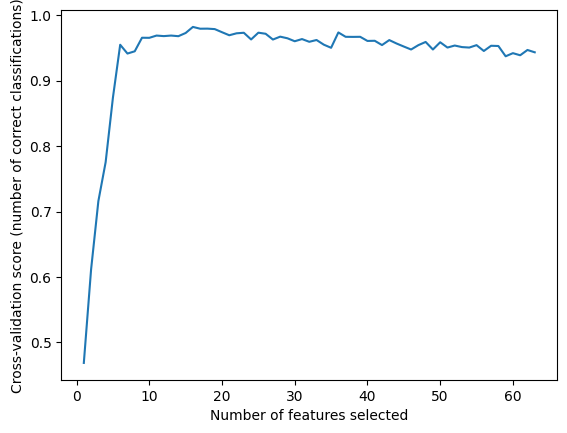

Highest cross-validation accuracy: 0.9820


In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

# Initialize a classifier for RFECV
classifier = RandomForestClassifier(random_state=42)

# Create RFECV model
rfecv = RFECV(estimator=classifier, step=1, cv=StratifiedKFold(5), scoring='accuracy')

# Fit RFECV
rfecv.fit(X, y)

# Print optimal number of features and best features
print("Optimal number of features: ", rfecv.n_features_)
print("Best features: ", X.columns[rfecv.support_])

# Plot number of features VS. cross-validation scores
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (number of correct classifications)")

# Use the correct attribute name based on your scikit-learn version
try:
    grid_scores = rfecv.grid_scores_
except AttributeError:
    grid_scores = rfecv.cv_results_['mean_test_score']

plt.plot(range(1, len(grid_scores) + 1), grid_scores)
plt.show()


# Print the highest cross-validation accuracy
print(f"Highest cross-validation accuracy: {max(grid_scores):.4f}")


In [ ]:
!pip install tensorflow==2.8.0

In [ ]:
%tensorflow_version 2.x


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)


2.14.0


*Eleventhly, "Data Preparation and Train-Test Split," I am preparing the dataset for machine learning, encoding the target variable, and splitting the data into training and testing sets.*

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Assuming combined_df is your DataFrame with all data
# Extract the selected features and the target variable
features = combined_df[[' amazement', ' solemnity', ' calmness', ' power', ' joyful_activation',
                        ' tension', ' sadness', ' mood', ' liked', ' disliked', ' age',
                        'mfccs_mean', 'chroma_mean', 'mel_mean', 'contrast_mean',
                        'tonnetz_mean']].values

# 'target_emotion' is the column with the emotional labels
target = combined_df['target_emotion'].values

# Encode the categorical target variable
label_encoder = LabelEncoder()
encoded_target = label_encoder.fit_transform(target)

# Convert the encoded target to categorical
categorical_target = to_categorical(encoded_target)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, categorical_target, test_size=0.2, random_state=42)

print("Data preparation and splitting done.")


Data preparation and splitting done.


*Twelfthly, "Neural Network Model Training," I am defining and training a more complex Multi-Layer Perceptron (MLP) model for music emotion classification*.

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


# Define a more complex MLP model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),  # Dropout layer for regularization
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),  # Another dropout layer
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(y_train.shape[1], activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)  # Increased epochs

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/100
169/169 [==============================] - 1s 3ms/step - loss: 1.1454 - accuracy: 0.5645 - val_loss: 0.4753 - val_accuracy: 0.8580
Epoch 2/100
169/169 [==============================] - 0s 2ms/step - loss: 0.4939 - accuracy: 0.8381 - val_loss: 0.2329 - val_accuracy: 0.9197
Epoch 3/100
169/169 [==============================] - 0s 2ms/step - loss: 0.2993 - accuracy: 0.8941 - val_loss: 0.1411 - val_accuracy: 0.9435
Epoch 4/100
169/169 [==============================] - 0s 2ms/step - loss: 0.2034 - accuracy: 0.9271 - val_loss: 0.0792 - val_accuracy: 0.9747
Epoch 5/100
169/169 [==============================] - 0s 2ms/step - loss: 0.1627 - accuracy: 0.9414 - val_loss: 0.0528 - val_accuracy: 0.9859
Epoch 6/100
169/169 [==============================] - 0s 2ms/step - loss: 0.1268 - accuracy: 0.9556 - val_loss: 0.0402 - val_accuracy: 0.9896
Epoch 7/100
169/169 [==============================] - 0s 2ms/step - loss: 0.1032 - accuracy: 0.9654 - val_loss: 0.0366 - val_accuracy: 0.9896

In [ ]:
from joblib import dump
dump(model, 'my_keras_model.joblib')



['my_keras_model.joblib']

*Lastly, "ROC-AUC Evaluation," I am enhancing the model evaluation by using the ROC-AUC (Receiver Operating Characteristic - Area Under the Curve) score as a metric.*

In [ ]:
import tensorflow.keras.metrics as metrics

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[metrics.AUC(name='auc', multi_label=True)])
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
# Predict probabilities for the test set
y_pred_probs = model.predict(X_test)

# Calculate the ROC-AUC score
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred_probs, multi_class='ovr')
print("ROC-AUC Score:", roc_auc)


Epoch 1/100
169/169 [==============================] - 2s 4ms/step - loss: 0.0159 - auc: 0.9997 - val_loss: 0.0170 - val_auc: 0.9994
Epoch 2/100
169/169 [==============================] - 0s 3ms/step - loss: 0.0170 - auc: 0.9998 - val_loss: 0.0150 - val_auc: 0.9994
Epoch 3/100
169/169 [==============================] - 0s 2ms/step - loss: 0.0141 - auc: 0.9980 - val_loss: 0.0167 - val_auc: 0.9993
Epoch 4/100
169/169 [==============================] - 0s 2ms/step - loss: 0.0170 - auc: 0.9997 - val_loss: 0.0157 - val_auc: 0.9998
Epoch 5/100
169/169 [==============================] - 0s 2ms/step - loss: 0.0137 - auc: 0.9999 - val_loss: 0.0167 - val_auc: 0.9993
Epoch 6/100
169/169 [==============================] - 0s 3ms/step - loss: 0.0167 - auc: 0.9998 - val_loss: 0.0156 - val_auc: 0.9994
Epoch 7/100
169/169 [==============================] - 0s 3ms/step - loss: 0.0141 - auc: 0.9998 - val_loss: 0.0151 - val_auc: 0.9996
Epoch 8/100
169/169 [==============================] - 0s 2ms/step - 

In [ ]:
import pandas as pd

# Assuming combined_df is your original DataFrame with all the data


# Select the features columns
features_columns = ['track_id']

# Create the new DataFrame with selected features and target emotion
new_combined_df = combined_df[features_columns + ['target_emotion']]



In [ ]:
def generate_file_path(track_id):
    base_path = "/content/drive/My Drive/Colab Notebooks/"
    if 1 <= track_id <= 100:
        genre = "classical"
    elif 101 <= track_id <= 200:
        genre = "rock"
    elif 201 <= track_id <= 300:
        genre = "electronic"
    elif 301 <= track_id <= 400:
        genre = "pop"
    else:
        return None
    file_number = track_id % 100 if track_id % 100 != 0 else 100
    return f"{base_path}{genre}/{file_number}.mp3"

In [ ]:
# Assuming new_combined_df is a subset of another DataFrame
new_combined_df = new_combined_df.copy()
new_combined_df['file_path'] = new_combined_df['track_id'].apply(generate_file_path)

In [ ]:
new_combined_df.to_csv('new_combined_data.csv', index=False)

In [ ]:
from google.colab import files
files.download('new_combined_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(new_combined_df.head())
print(new_combined_df.tail())

   track_id target_emotion                                          file_path
0         1          Happy  /content/drive/My Drive/Colab Notebooks/classi...
1         1        Neutral  /content/drive/My Drive/Colab Notebooks/classi...
2         1            Sad  /content/drive/My Drive/Colab Notebooks/classi...
3         1        Neutral  /content/drive/My Drive/Colab Notebooks/classi...
4         1        Neutral  /content/drive/My Drive/Colab Notebooks/classi...
      track_id target_emotion  \
8402       400      Surprised   
8403       400          Happy   
8404       400          Angry   
8405       400           Fear   
8406       400          Angry   

                                              file_path  
8402  /content/drive/My Drive/Colab Notebooks/pop/10...  
8403  /content/drive/My Drive/Colab Notebooks/pop/10...  
8404  /content/drive/My Drive/Colab Notebooks/pop/10...  
8405  /content/drive/My Drive/Colab Notebooks/pop/10...  
8406  /content/drive/My Drive/Colab Noteboo

In [ ]:
!pip install pymysql


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 685.3 kB/s eta 0:00:00


In [ ]:
!pip install pymysql